In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger
# A basic example how to use the package

In [1]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pickle
sys.path.append("../")
from pone_dm import PDM, config

In [2]:
# picture path
PICS = '../pics/'

In [4]:
# Some example settings


In [5]:
pdm = PDM()

AttributeError: 'Atm_Shower' object has no attribute '_egrid'

In [3]:
# Grids
mass_grid = np.logspace(3, 6, 31)
sv_grid = np.logspace(-28, -22, 50)
# The limit calculation
pdm.limit_calc(mass_grid=mass_grid, sv_grid=sv_grid[::-1])

NameError: name 'pdm' is not defined

In [ ]:
# Plotting standards
std_size = 10.  # Size of the plot
fontsize = 20.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

1.0
0.0019113711555189816
[<matplotlib.lines.Line2D object at 0x00000210D499EBE0>, <matplotlib.lines.Line2D object at 0x00000210D499EEB0>, <matplotlib.lines.Line2D object at 0x00000210D59A1280>]


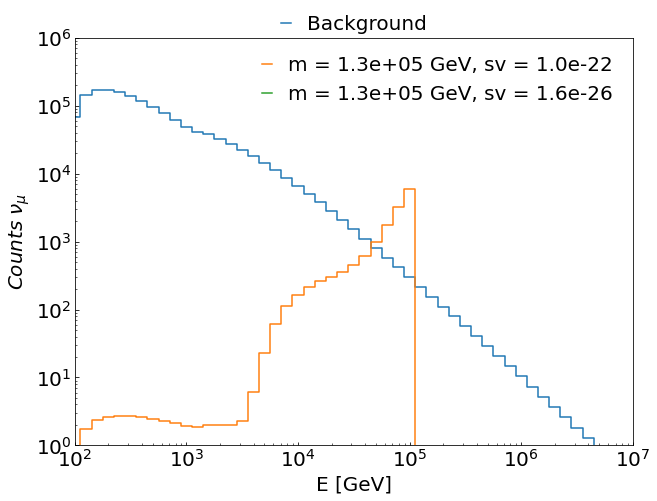

In [ ]:
# Particle counts
# ---------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.step(pdm._shower_sim.egrid,
         pdm._limit_calc._numu_bkgrd,
         label='Background')
mass_id = -10
sv_id = -1
ax1.step(pdm._shower_sim.egrid,
         pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]],
         label='m = %.1e GeV, sv = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
# The correspondin CL value
x = (
    (pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]]**2.)[pdm._limit_calc._t_d:] /
    pdm._limit_calc._numu_bkgrd[pdm._limit_calc._t_d:]
)
print(1. - chi2.sf(np.sum(np.nan_to_num(x)), 2))
mass_id = -10
sv_id = 18
ax1.step(pdm._shower_sim.egrid,
         pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]],
         label='m = %.1e GeV, sv = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
# Corresponding CL value
x = (
    (pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]]**2.)[pdm._limit_calc._t_d:] /
    pdm._limit_calc._numu_bkgrd[pdm._limit_calc._t_d:]
)
print(1. - chi2.sf(np.sum(np.nan_to_num(x)), 2))
# ---------------------------------------------
# Axis options
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"E [GeV]", fontsize=fontsize)
ax1.set_ylabel(r"$Counts\;{\nu_\mu}$", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_ylim(1e0, 1e6)
ax1.set_xlim(1e2, 1e7)
# ---------------------------------------------
# Legend
h, l = ax1.get_legend_handles_labels()
print(h)
lgd1 = ax1.legend([h[0]], [l[0]], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[1:], l[1:], loc=9, bbox_to_anchor=(0.65, +1.0),
                  ncol=1, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Flux_Example.png",
               bbox_inches='tight', dpi=export_dpi)

In [ ]:
test_chi2 = np.array([[
    (pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]]**2.)[pdm._limit_calc._t_d:] /
    pdm._limit_calc._numu_bkgrd[pdm._limit_calc._t_d:] for mass_id in range(0, len(mass_grid))
] for sv_id in range(0, len(sv_grid))])

In [ ]:
CL_test = np.array([[
    1. - chi2.sf(np.sum(np.nan_to_num(SoB)), 2) for SoB in line
] for line in test_chi2])

In [ ]:
# Loading comparison data
cl_lit = np.loadtxt('../Data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

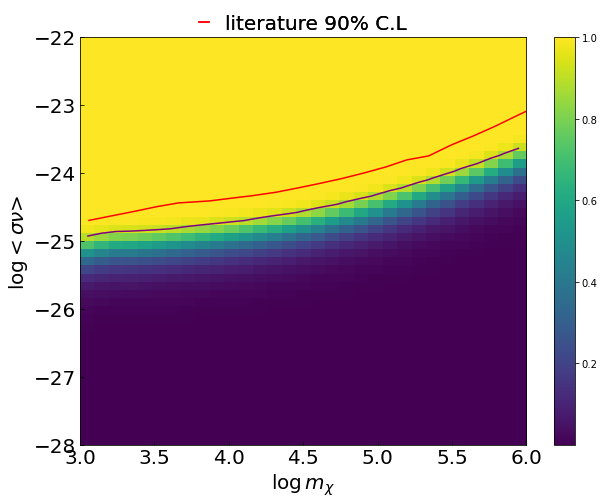

In [ ]:
# Limits
# ---------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.contour(1 - pdm.results, levels = [0.9], colors='purple',
            origin='upper', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
pos = ax1.imshow(1 - pdm.results, extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                          min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                 origin='upper', aspect='auto')
figure.colorbar(pos, ax=ax1)
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'r', label='literature 90% C.L')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"$\log<\sigma \nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), max(np.log10(sv_grid)))
# ---------------------------------------------
# Legend
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Limits_Example.png",
               bbox_inches='tight', dpi=export_dpi)